# Exploratory Data Analysis - EDA


### Summary
This notebook was prepared to show the exploratory data analysis about real state prices in Porto Alegre (Brazil). This is the third stage, where the next and last will be to construct a model to estimate apartments prices.


### Research Questions

1. What are the statistics that describe the sample?
2. What are the features that have the highest degree of correlation with each other?



___
### Import modules

In [1]:
import numpy as np
import time
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

___
### Import dataset

In [2]:
df = pd.read_csv('wrangled_foxter.csv', sep='\t', decimal=',') # dataset from notebook 2 data_wrangling

print("Total of rows:", df.shape[0])

Total of rows: 226


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
Unnamed: 0     226 non-null int64
price          226 non-null object
area           226 non-null object
district       226 non-null object
condominium    226 non-null object
iptu           226 non-null object
rooms          226 non-null int64
box            226 non-null int64
dtypes: int64(3), object(5)
memory usage: 14.2+ KB


In [4]:
# Drop unnecessary column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df['price'] = df['price'].astype(float)
df['area'] = df['area'].astype(float)
df['condominium'] = df['condominium'].astype(float)
df['iptu'] = df['iptu'].astype(float)

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
df.head()

price   area     district  condominium     iptu  rooms  box
0   670,000.00  74.43  Mont Serrat       717.00 1,400.00      2    1
1   990,000.00 104.83   Bela Vista       800.00 3,070.00      3    2
2 1,750,000.00 203.37   Bela Vista     1,850.00 4,500.00      4    3
3 1,800,000.00 138.79   Bela Vista     1,100.00 3,600.00      3    3
4 1,925,000.00 154.11  Auxiliadora     1,000.00 4,000.00      3    4

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 7 columns):
price          226 non-null float64
area           226 non-null float64
district       226 non-null object
condominium    226 non-null float64
iptu           226 non-null float64
rooms          226 non-null int64
box            226 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 12.4+ KB


___
## Analysis

### Initial Description

In [9]:
# Total of offers
df.shape[0]

226

In [10]:
# Variables
df.info()
print('\n\nVariables: ', list(df), '\n')
print('Total: ',df.shape[1], '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 7 columns):
price          226 non-null float64
area           226 non-null float64
district       226 non-null object
condominium    226 non-null float64
iptu           226 non-null float64
rooms          226 non-null int64
box            226 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 12.4+ KB


Variables:  ['price', 'area', 'district', 'condominium', 'iptu', 'rooms', 'box'] 

Total:  7 



In [11]:
# One continum and quatitative variable "target": price

target = ['price']

In [12]:
# Quantitative features

features_quanti = list(set(list(df.select_dtypes(include=['float64', 'int64']).columns)) - set(target))
print('Quantitative features: ', features_quanti)
print('Total: ', len(features_quanti))

Quantitative features:  ['condominium', 'area', 'box', 'iptu', 'rooms']
Total:  5


In [13]:
# Categorical Features

features_cat = list(df.select_dtypes(include=['category', 'object']).columns)
print('Categorical Features: ', features_cat)
print('Total: ', len(features_cat))

Categorical Features:  ['district']
Total:  1


In [14]:
# All features

features_list = features_quanti + features_cat
print(features_list)

['condominium', 'area', 'box', 'iptu', 'rooms', 'district']


### Univariate Analysis Section

In [15]:
# Quantitative variables description

df.describe()

price   area  condominium     iptu  rooms    box
count       226.00 226.00       226.00   226.00 226.00 226.00
mean    923,572.89 112.76       825.88 1,946.77   2.49   1.89
std     585,765.75  50.89       484.64 1,266.43   0.80   1.01
min     170,000.00  32.13       130.00    43.00   1.00   1.00
25%     499,250.00  73.31       418.50 1,002.50   2.00   1.00
50%     728,151.50 103.11       740.00 1,500.00   3.00   2.00
75%   1,222,500.00 144.29     1,190.00 2,784.50   3.00   3.00
max   3,114,542.00 257.60     2,330.00 5,500.00   4.00   4.00

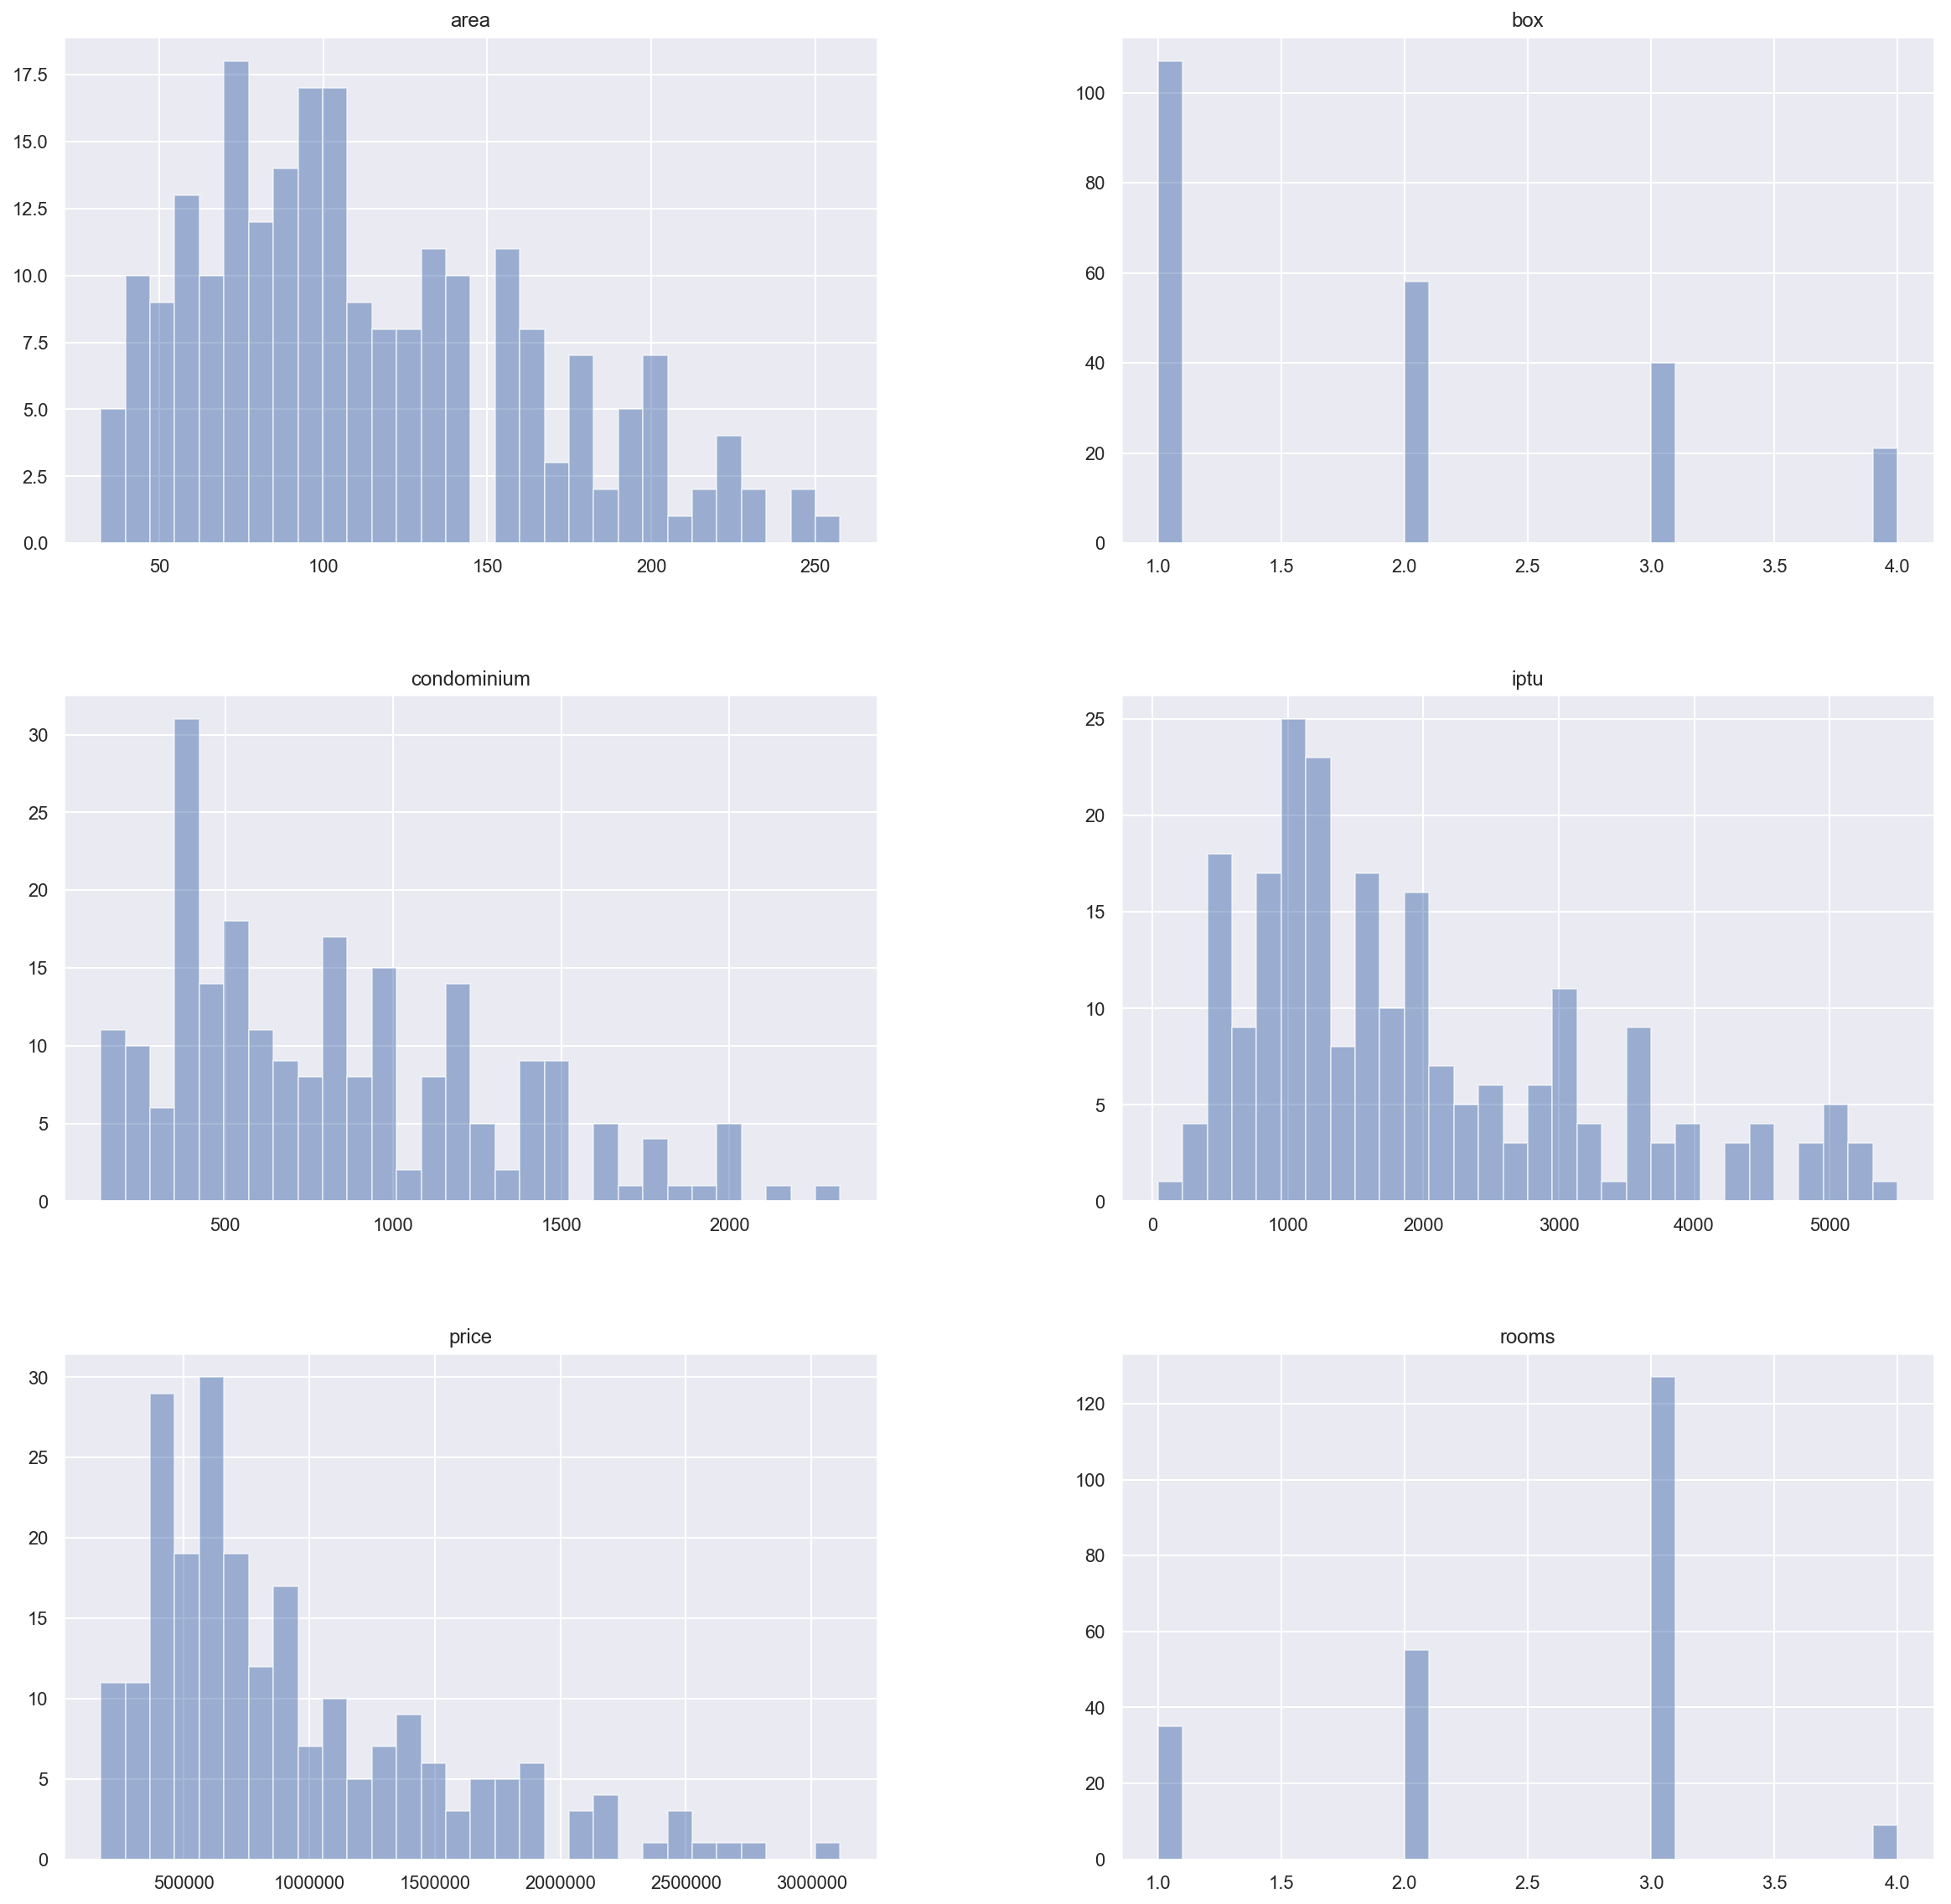

In [16]:
# Histograms

sns.set()
quanti_hist = list(df.select_dtypes(include=['float64', 'int64']).columns)
df[quanti_hist].hist(layout=(int(len(quanti_hist)/2),2), alpha=0.5, bins=30, figsize=(20, 20))
plt.show()

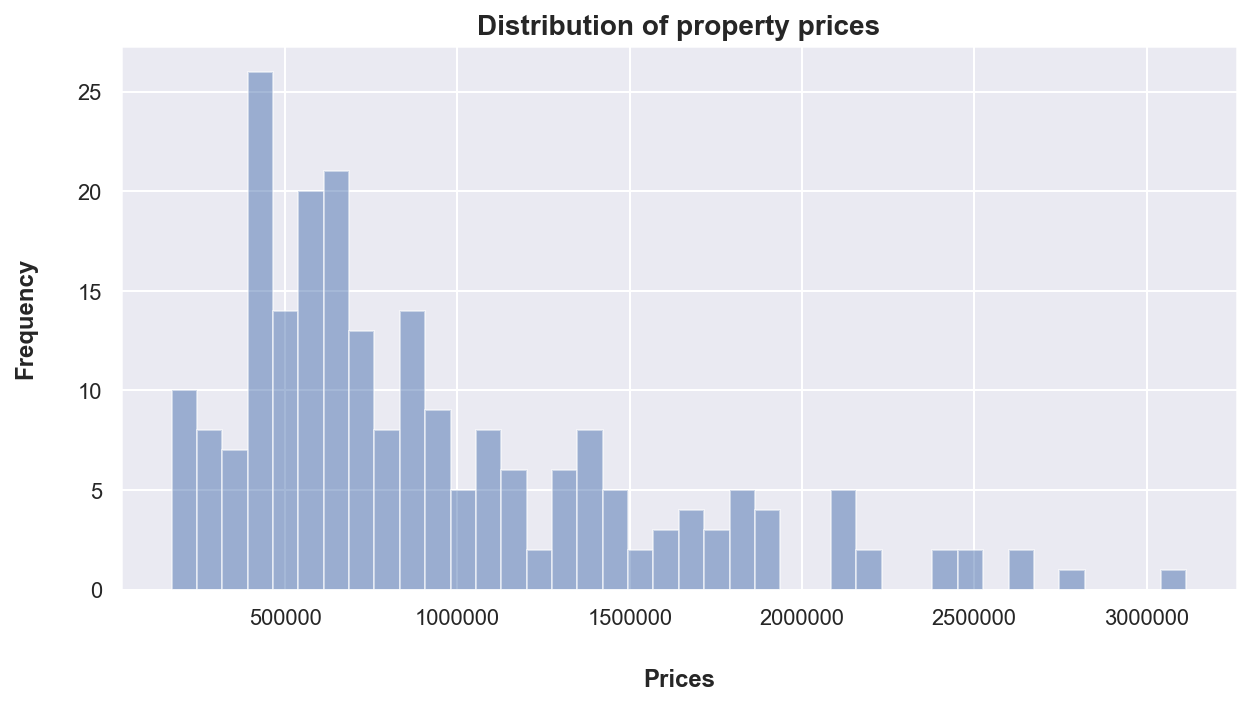

In [17]:
# Histogram: price

sns.set()
ax = df['price'].plot.hist(bins=40, alpha=0.5, figsize=(10, 5))
ax.set_title('Distribution of property prices', weight='bold', size=14)
ax.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)
ax.set_xlabel('Prices', labelpad=20, weight='bold', size=12)
plt.show()

In [18]:
# Qualitative variavle description

df.describe(include=['object'])

district
count           226
unique            3
top     Auxiliadora
freq            101

In [19]:
# Quantity by district

df['district'].value_counts()

Auxiliadora    101
Bela Vista      77
Mont Serrat     48
Name: district, dtype: int64

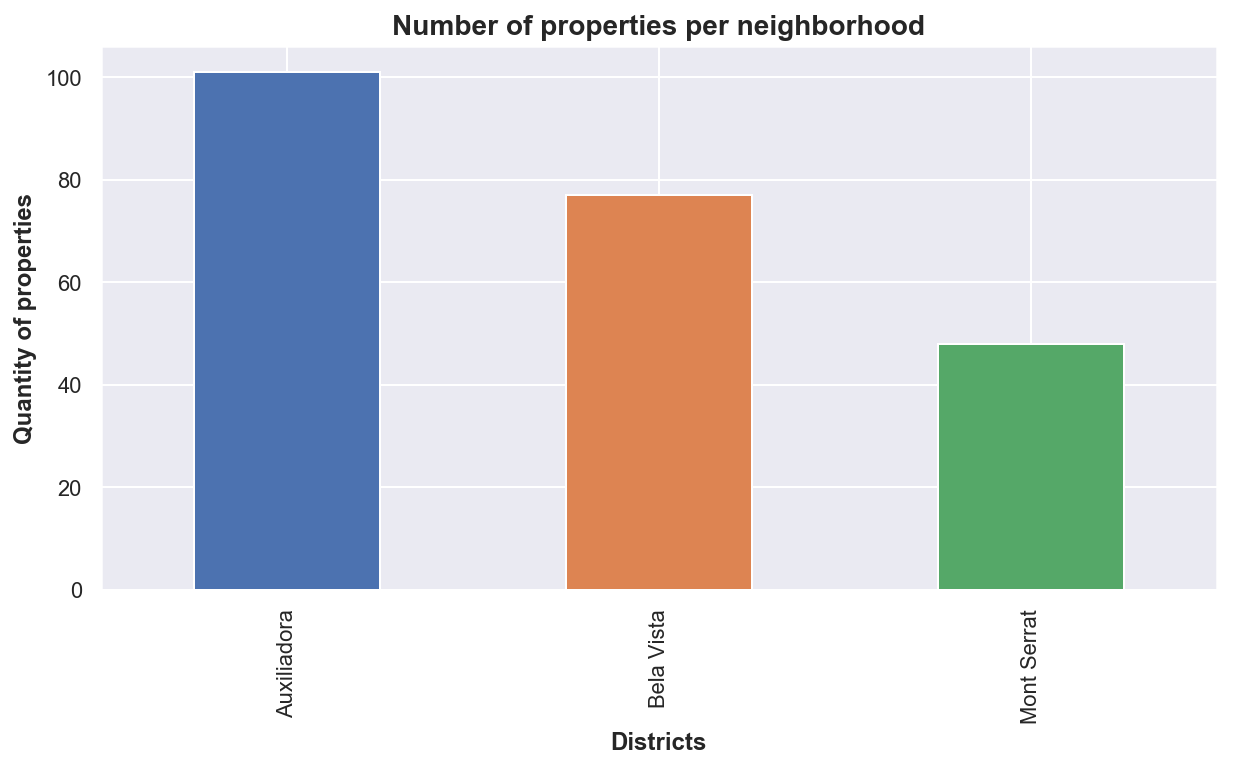

In [20]:
sns.set()
ax = df['district'].value_counts().plot.bar(figsize=(10, 5))
ax.set_title('Number of properties per neighborhood', weight='bold', size=14)
ax.set_ylabel('Quantity of properties', weight='bold', size=12)
ax.set_xlabel('Districts', weight='bold', size=12)
plt.show()

### Bivariate Charts Section

Calculating the mean for quantitative variables.

In [21]:
pd.pivot_table(df, index=["district"],aggfunc={
    "price":np.mean, 
    "area":np.mean, 
    "condominium":np.mean, 
    "rooms":np.mean,  
    "iptu":np.mean,
    "box":np.mean})

area  box  condominium     iptu        price  rooms
district                                                         
Auxiliadora 105.74 1.69       733.61 1,705.47   818,909.97   2.51
Bela Vista  127.32 2.27       975.48 2,386.32 1,140,049.92   2.53
Mont Serrat 104.19 1.69       780.04 1,749.42   796,535.88   2.35

### District  x  Quantity of rooms

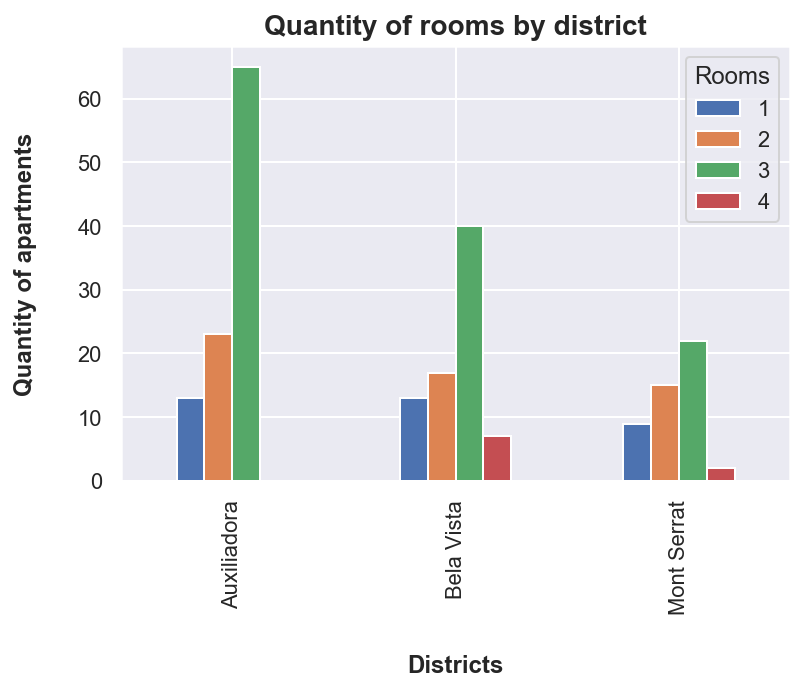

In [22]:
sns.set()
cr = pd.crosstab(df['district'], df['rooms'])
ax = cr.plot.bar()
ax.legend(title="Rooms")
ax.set_title('Quantity of rooms by district', weight='bold', size=14)
ax.set_ylabel("Quantity of apartments", labelpad=20, weight='bold', size=12)
ax.set_xlabel('Districts', labelpad=20, weight='bold', size=12)
plt.show()

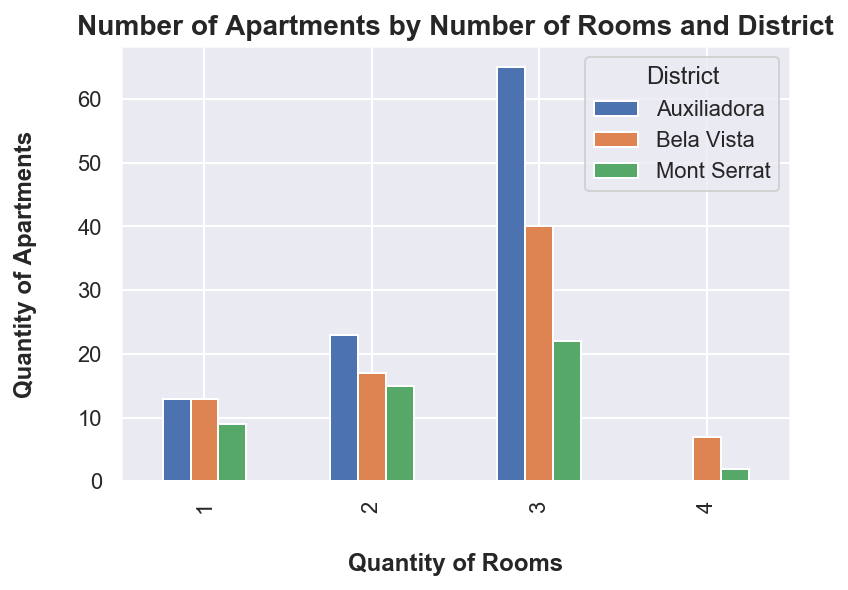

In [23]:
sns.set()
cr = pd.crosstab(df['rooms'], df['district'])
ax = cr.plot.bar()
ax.legend(title="District")
ax.set_title('Number of Apartments by Number of Rooms and District', weight='bold', size=14)
ax.set_ylabel("Quantity of Apartments", labelpad=20, weight='bold', size=12)
ax.set_xlabel('Quantity of Rooms', labelpad=20, weight='bold', size=12)
plt.show()

In [24]:
# Quantity: Rooms x Districts

pd.pivot_table(df, index=["rooms"], columns=["district"], values=["price"], aggfunc=len, margins=True)#.stack('district')

price                              
district Auxiliadora Bela Vista Mont Serrat    All
rooms                                             
1              13.00      13.00        9.00  35.00
2              23.00      17.00       15.00  55.00
3              65.00      40.00       22.00 127.00
4                nan       7.00        2.00   9.00
All           101.00      77.00       48.00 226.00

In [25]:
# Descriptive statistics for rooms by districts
pd.DataFrame.groupby(df['rooms'], df['district']).describe()

count  mean  std  min  25%  50%  75%  max
district                                              
Auxiliadora 101.00  2.51 0.72 1.00 2.00 3.00 3.00 3.00
Bela Vista   77.00  2.53 0.88 1.00 2.00 3.00 3.00 4.00
Mont Serrat  48.00  2.35 0.84 1.00 2.00 2.50 3.00 4.00

### Garage  x  District

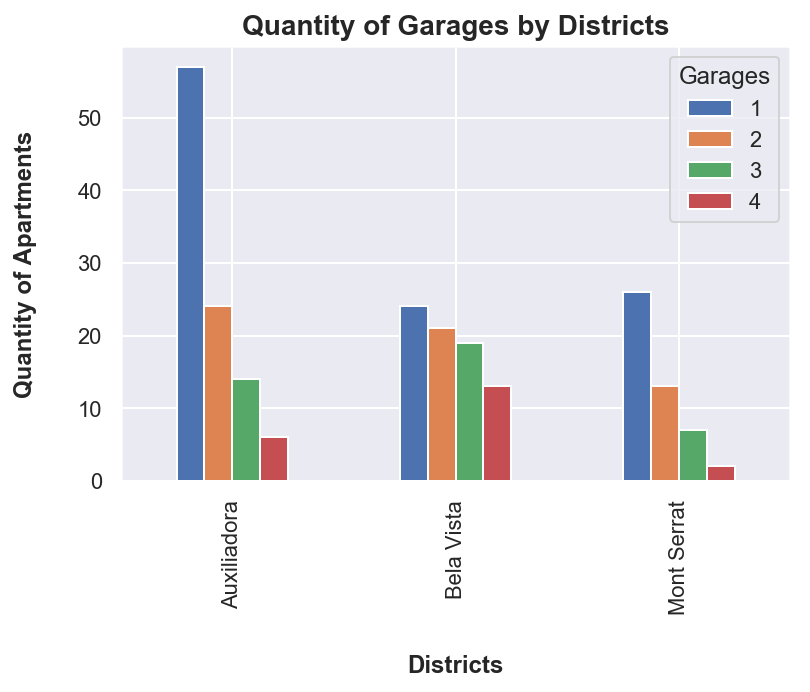

In [26]:
sns.set()
cr = pd.crosstab(df['district'], df['box'])
ax = cr.plot.bar()
ax.legend(title="Garages")
ax.set_title('Quantity of Garages by Districts', weight='bold', size=14)
ax.set_ylabel("Quantity of Apartments", labelpad=20, weight='bold', size=12)
ax.set_xlabel('Districts', labelpad=20, weight='bold', size=12)
plt.show()

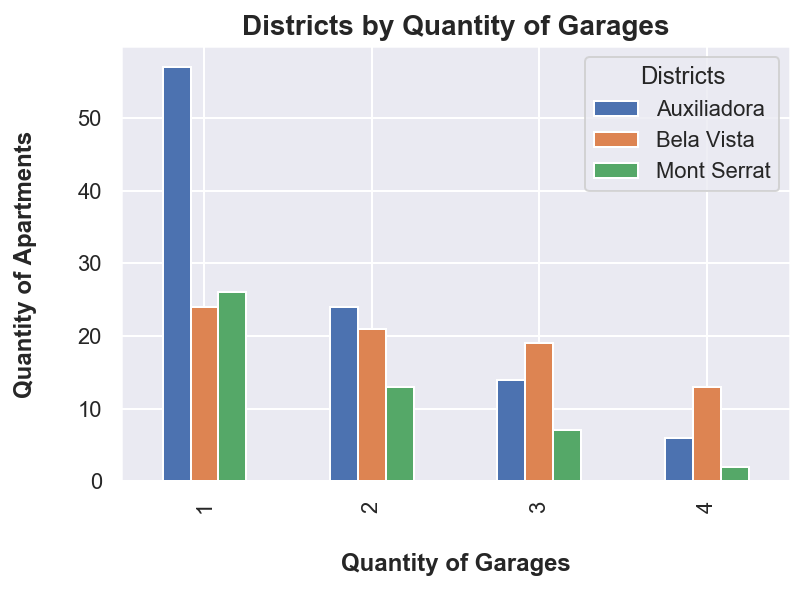

In [27]:
sns.set()
cr = pd.crosstab(df['box'], df['district'])
ax = cr.plot.bar()
ax.legend(title="Districts")
ax.set_title('Districts by Quantity of Garages', weight='bold', size=14)
ax.set_ylabel("Quantity of Apartments", labelpad=20, weight='bold', size=12)
ax.set_xlabel('Quantity of Garages', labelpad=20, weight='bold', size=12)
plt.show()

In [28]:
# Quantity: Garages  x  Districts

pd.pivot_table(df, index=["box"], columns=["district"], values=["price"], aggfunc=len, margins=True)#.stack('district')

price                              
district Auxiliadora Bela Vista Mont Serrat    All
box                                               
1              57.00      24.00       26.00 107.00
2              24.00      21.00       13.00  58.00
3              14.00      19.00        7.00  40.00
4               6.00      13.00        2.00  21.00
All           101.00      77.00       48.00 226.00

In [29]:
# Descriptive statistic for garages ('box') by districts
pd.DataFrame.groupby(df['box'], df['district']).describe()

count  mean  std  min  25%  50%  75%  max
district                                              
Auxiliadora 101.00  1.69 0.92 1.00 1.00 1.00 2.00 4.00
Bela Vista   77.00  2.27 1.08 1.00 1.00 2.00 3.00 4.00
Mont Serrat  48.00  1.69 0.88 1.00 1.00 1.00 2.00 4.00

In [30]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [31]:
# boxplot: price

x = df.district

trace0 = go.Box(
    y=df.price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='price to sell (R$)',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [32]:
# Descriptive statistics for price by districts
pd.DataFrame.groupby(df['price'], df['district']).describe()

count         mean        std        min        25%        50%  \
district                                                                      
Auxiliadora 101.00   818,909.97 516,647.81 185,000.00 460,000.00 650,000.00   
Bela Vista   77.00 1,140,049.92 658,071.36 170,000.00 660,000.00 920,000.00   
Mont Serrat  48.00   796,535.88 507,560.21 180,000.00 415,000.00 644,000.00   

                     75%          max  
district                               
Auxiliadora 1,100,000.00 2,800,000.00  
Bela Vista  1,600,000.00 3,114,542.00  
Mont Serrat   961,250.00 2,470,000.00

In [33]:
# boxplot area

x = df.district

trace0 = go.Box(
    y=df.area,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='Area (m2)',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [34]:
# Descriptive statistics for area by district
pd.DataFrame.groupby(df['area'], df['district']).describe()

count   mean   std   min   25%    50%    75%    max
district                                                        
Auxiliadora 101.00 105.74 41.83 37.50 74.00  99.86 134.00 201.58
Bela Vista   77.00 127.32 57.10 32.13 82.93 110.63 168.91 257.60
Mont Serrat  48.00 104.19 53.59 39.00 65.40  91.69 137.64 243.28

In [35]:
# boxplot: condominium value

x = df.district

trace0 = go.Box(
    y=df.condominium,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='Condominium Value (R$)',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [36]:
# Descriptive statistics for condomium by districts
pd.DataFrame.groupby(df['condominium'], df['district']).describe()

count   mean    std    min    25%    50%      75%      max
district                                                               
Auxiliadora 101.00 733.61 459.19 180.00 395.00 570.00 1,000.00 2,330.00
Bela Vista   77.00 975.48 498.07 140.00 504.00 980.00 1,300.00 2,000.00
Mont Serrat  48.00 780.04 466.42 130.00 400.00 708.50 1,080.75 2,150.00

In [37]:
# Boxplot iptu tax
x = df.district

trace0 = go.Box(
    y=df.iptu,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='IPTU Value (R$)',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [38]:
# Descriptive statistics for iptu by districs
pd.DataFrame.groupby(df['iptu'], df['district']).describe()

count     mean      std    min      25%      50%      75%  \
district                                                                 
Auxiliadora 101.00 1,705.47 1,098.58 280.00   930.00 1,400.00 2,178.00   
Bela Vista   77.00 2,386.32 1,425.97  43.00 1,200.00 2,000.00 3,500.00   
Mont Serrat  48.00 1,749.42 1,157.89 400.00   921.00 1,340.00 2,725.00   

                 max  
district              
Auxiliadora 5,200.00  
Bela Vista  5,500.00  
Mont Serrat 5,000.00

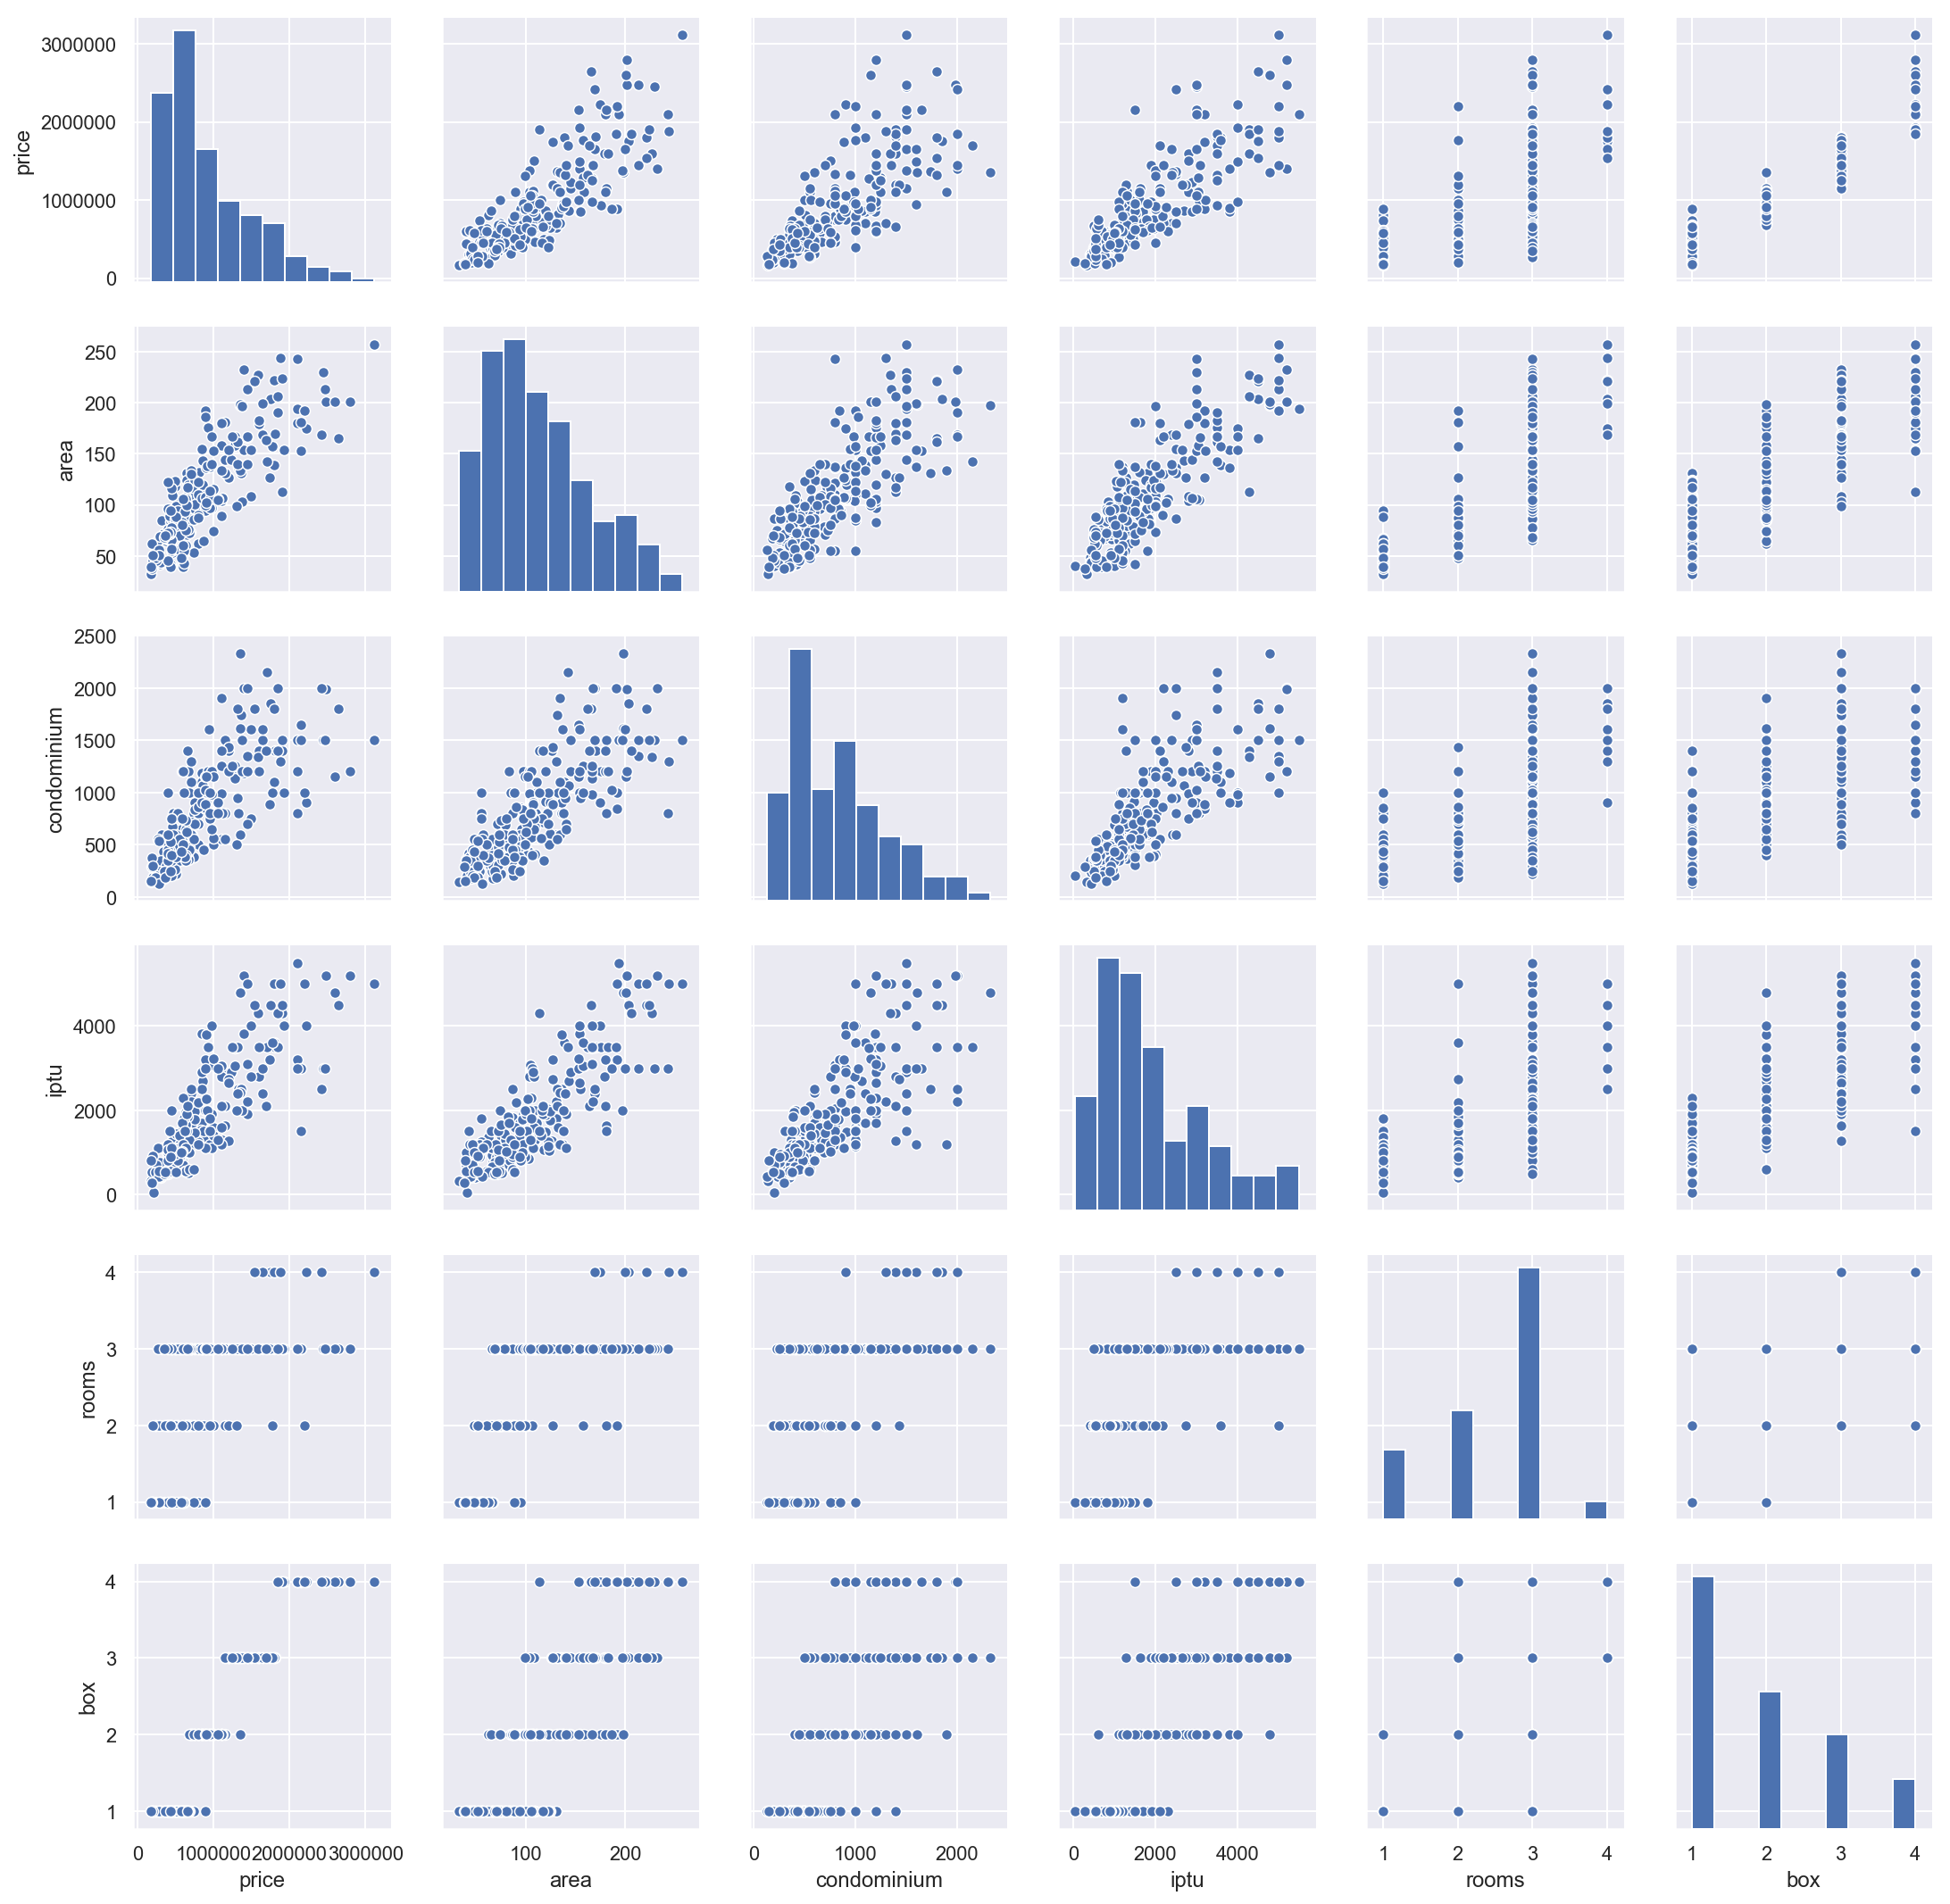

In [39]:
# Paiplot for all quantitative variables
sns.set() #sns.set(font_scale=0.5)
sns.pairplot(df)
plt.show()

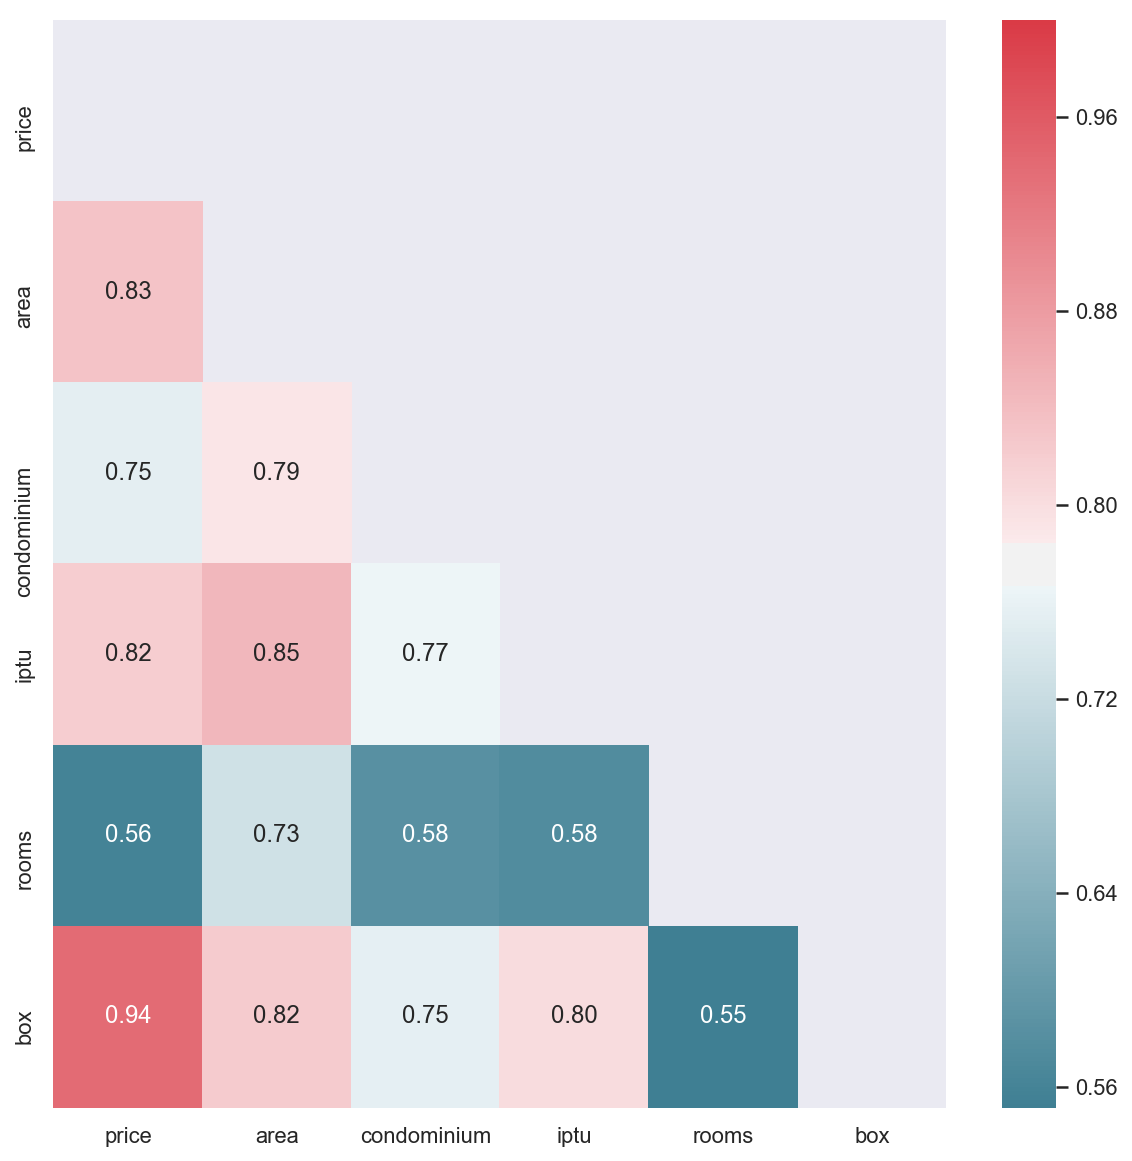

In [40]:
# Analysing correlations

corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.set()
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)

plt.show()

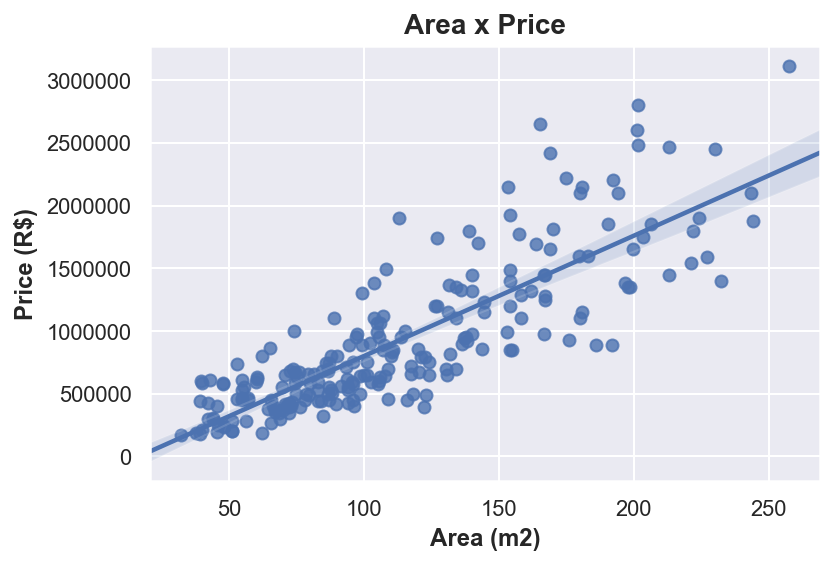

In [41]:
# Area x Price
sns.set()
sns.regplot(x='area', y='price', data=df)
plt.title('Area x Price', weight='bold', size=14)
plt.ylabel('Price (R$)', weight='bold', size=12)
plt.xlabel('Area (m2)', weight='bold', size=12)
plt.show()

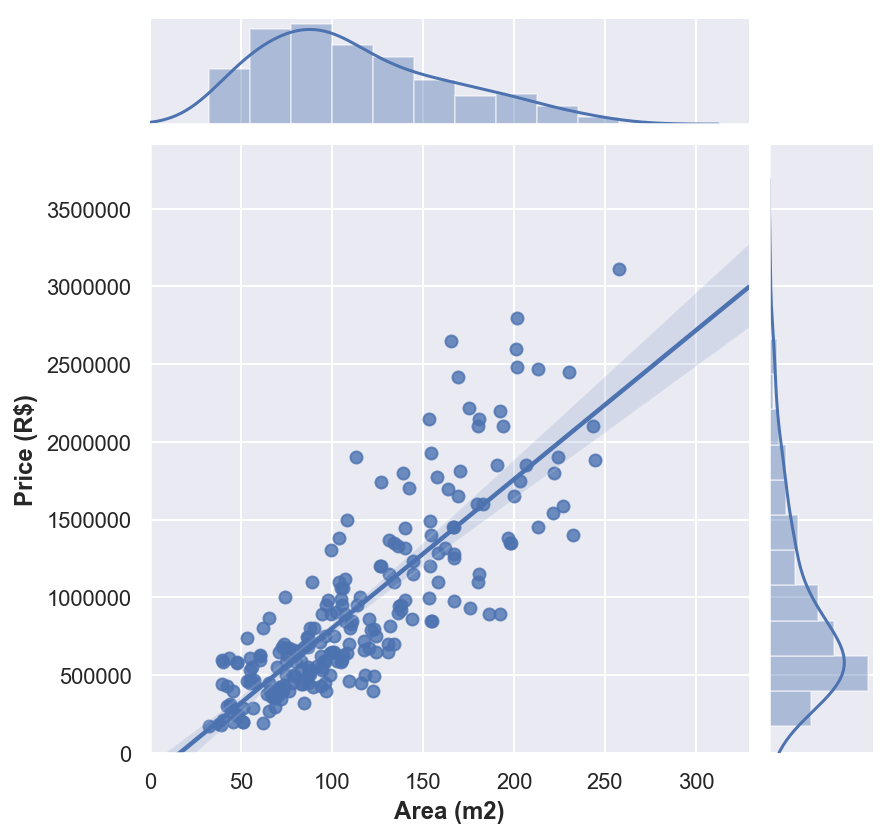

In [42]:
sns.set()
sns.jointplot(x="area", y="price", data=df, kind="reg")
plt.ylabel('Price (R$)', weight='bold', size=12)
plt.xlabel('Area (m2)', weight='bold', size=12)
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

In [43]:
# Calculating the price of m2
df["price_m2"] = df["price"] / df["area"]

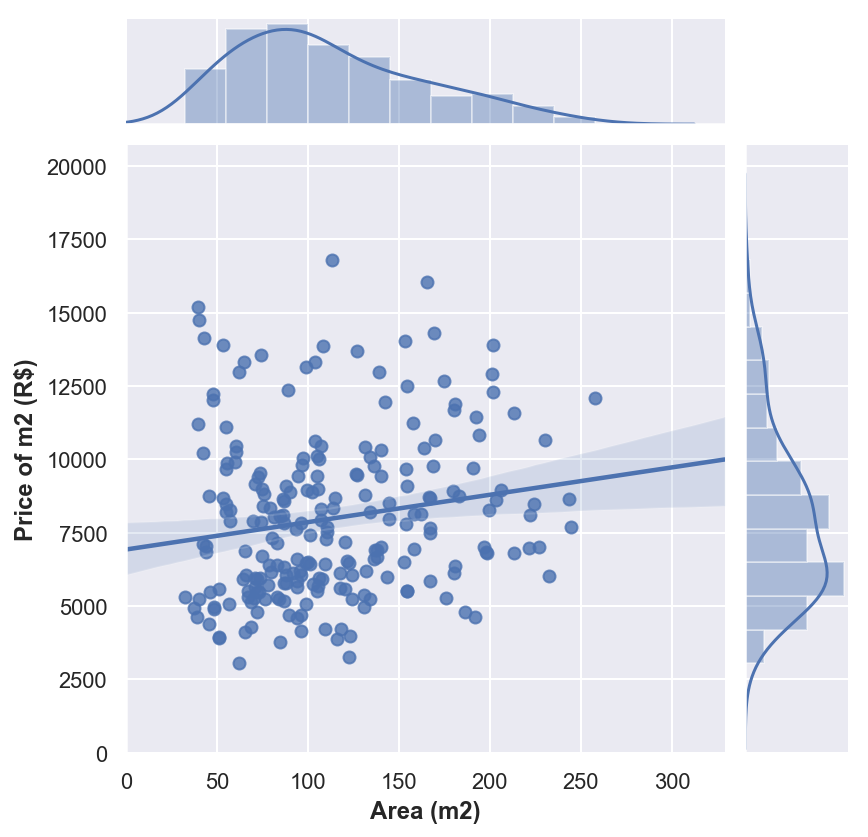

In [44]:
# Area x Price of m2

sns.set()
sns.jointplot(x="area", y="price_m2", data=df, kind="reg")
plt.ylabel('Price of m2 (R$)', weight='bold', size=12)
plt.xlabel('Area (m2)', weight='bold', size=12)
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

### Multivariate Section

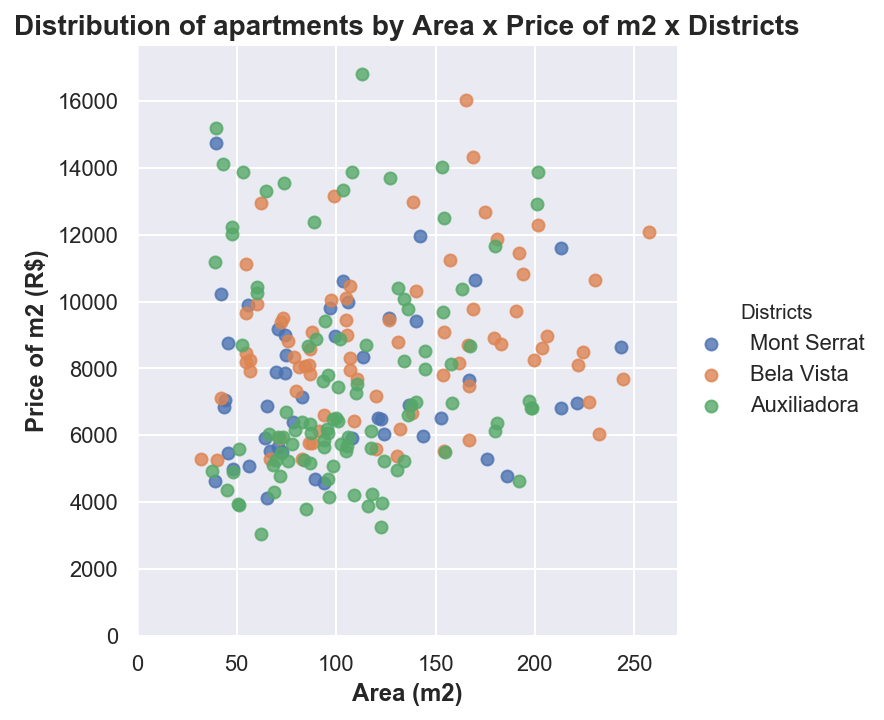

In [45]:
# Distribution of apartments by Area x Price x Districts
sns.set()
sns.lmplot(x='area', y='price_m2', data=df,
           fit_reg=False, 
           hue='district')._legend.set_title("Districts")
 
plt.title('Distribution of apartments by Area x Price of m2 x Districts', weight='bold', size=14)
plt.ylabel('Price of m2 (R$)', weight='bold', size=12)
plt.xlabel('Area (m2)', weight='bold', size=12)
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

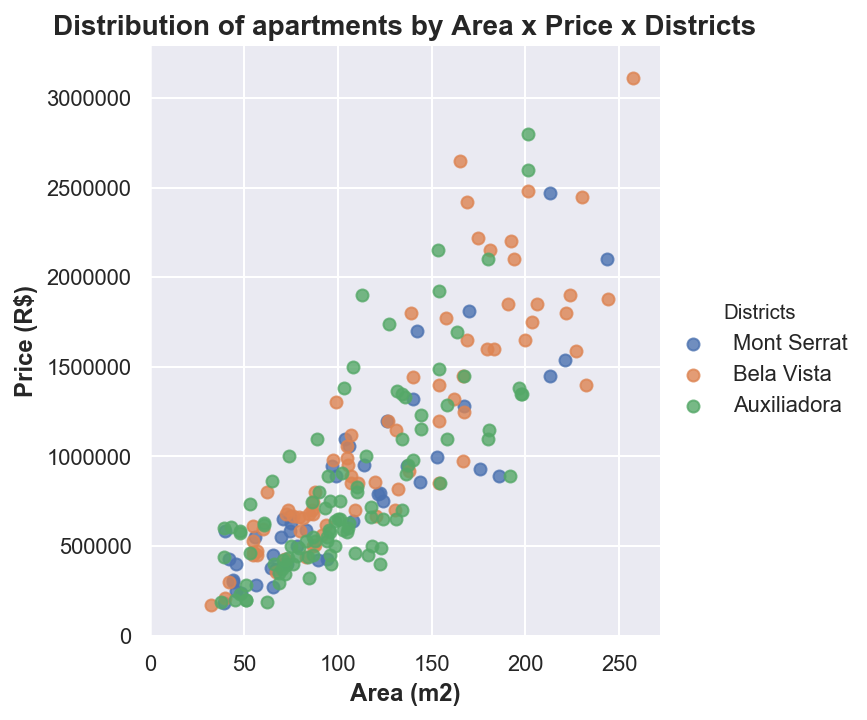

In [46]:
# Distribution of apartments by Area x Price x Districts
sns.set()
sns.lmplot(x='area', y='price', data=df,
           fit_reg=False, 
           hue='district')._legend.set_title("Districts")
 
plt.title('Distribution of apartments by Area x Price x Districts', weight='bold', size=14)
plt.ylabel('Price (R$)', weight='bold', size=12)
plt.xlabel('Area (m2)', weight='bold', size=12)
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

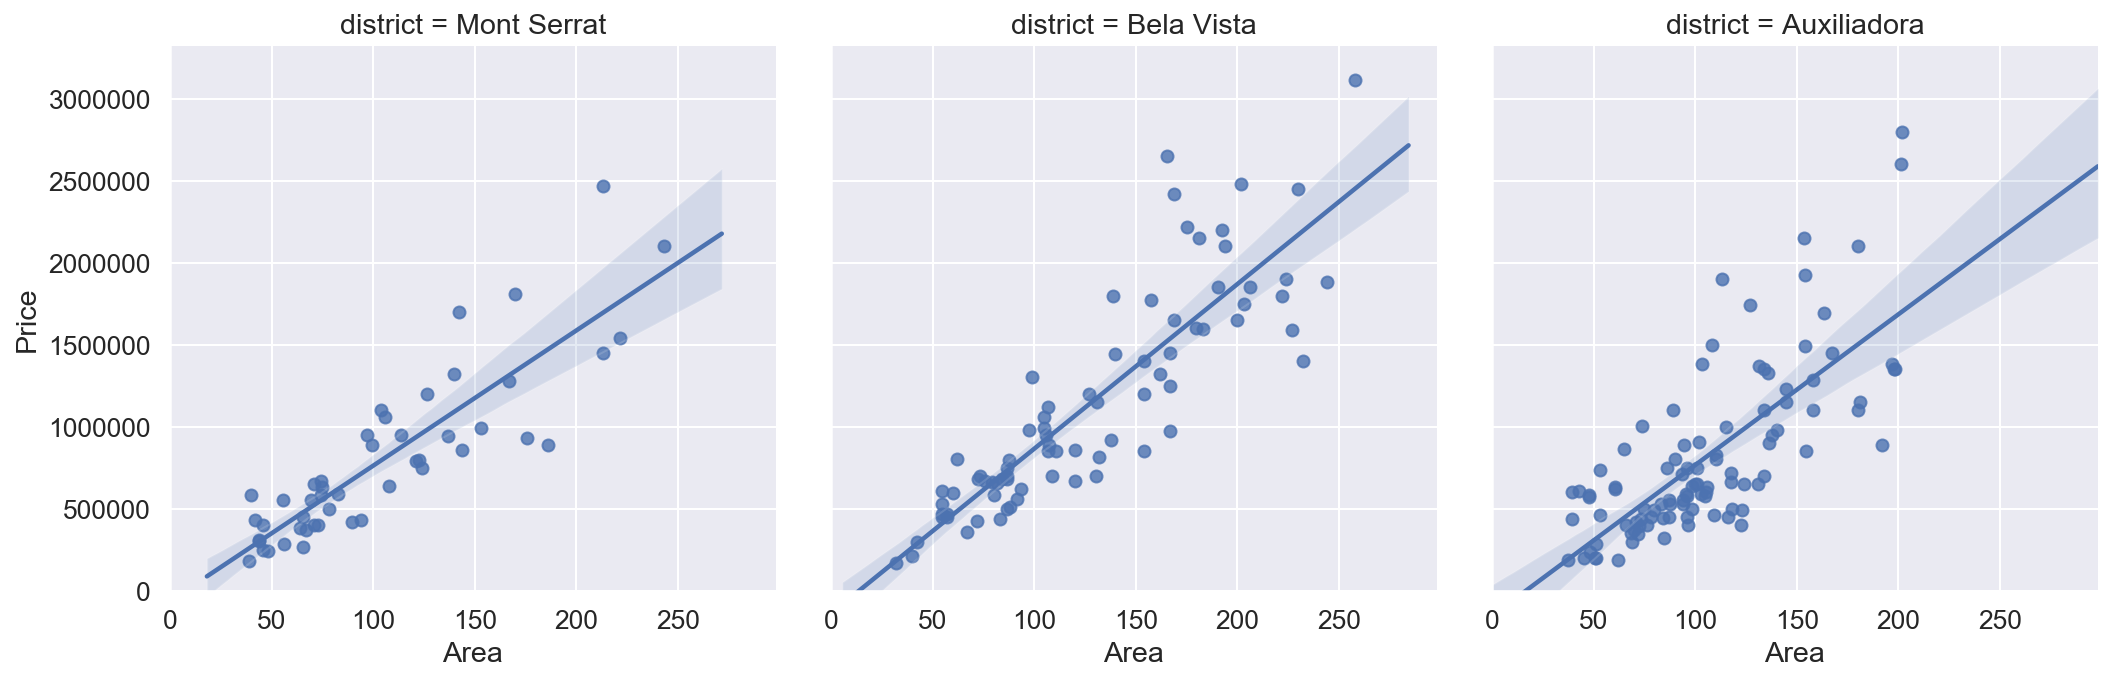

In [47]:
sns.set(font_scale=1.2)
sns.lmplot(x="area", y="price", col="district", 
               data=df, height=5).set_axis_labels("Area", "Price")
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

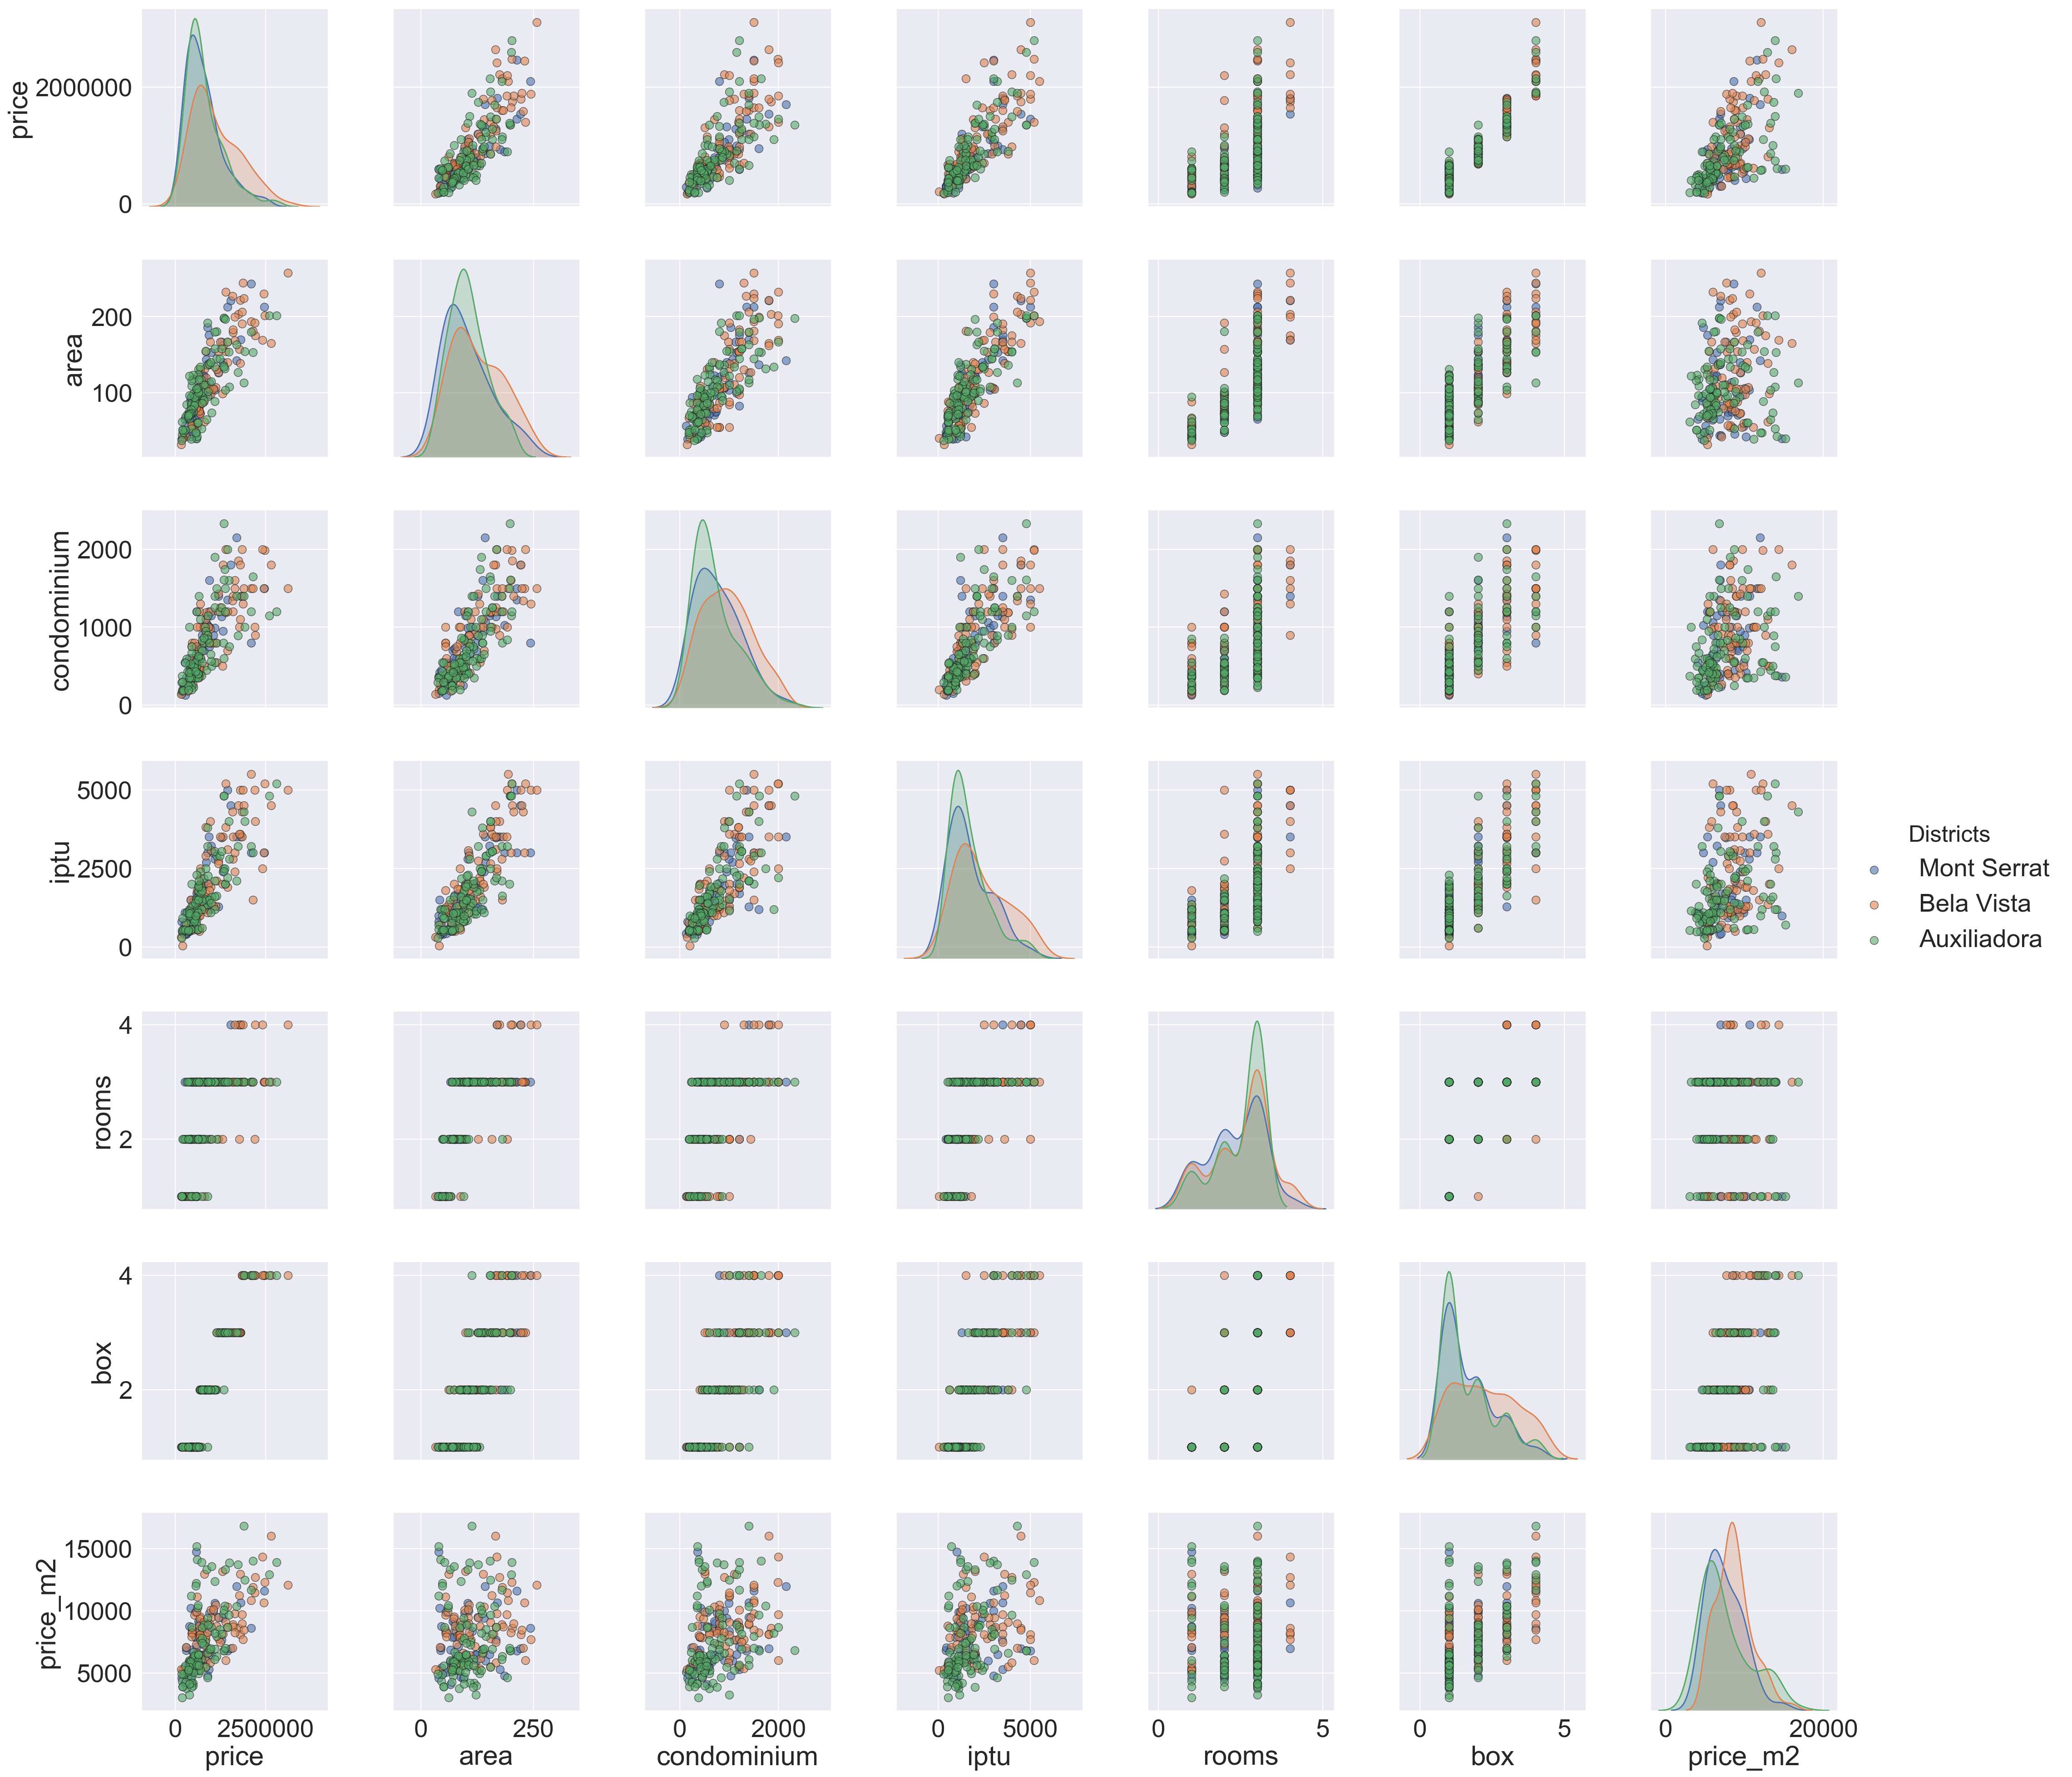

In [48]:
# Pairplot: color differentiation by districts

sns.set(font_scale=2.5)
sns.pairplot(df, hue = 'district', diag_kind = 'kde',
            plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)._legend.set_title("Districts")

plt.show()

___
### Save dataframe to .csv file

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
price          226 non-null float64
area           226 non-null float64
district       226 non-null object
condominium    226 non-null float64
iptu           226 non-null float64
rooms          226 non-null int64
box            226 non-null int64
price_m2       226 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.2+ KB


In [50]:
# Drop price_m2 because this variable leak from price (Y)
df.drop(['price_m2'], axis = 1, inplace = True)

In [51]:
df.to_csv(('wrangled_eda_foxter.csv'), sep='\t')